In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#한글 나오게
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [4]:
# #미세먼지 데이터 전처리
# def mise_make_csv(region):

#   from datetime import timedelta

#   months=range(1,35)
#   dfs=[]

#   for month in months:
#     path=f"/content/drive/MyDrive/동서발전 태양광 발전량 예측 AI 경진대회/data/{region}/df{month}.xls"
#     mise=pd.read_excel(path)
#     mise['날짜']=mise['날짜'].apply(lambda x: ' '.join([x.split()[0],str(int(x.split()[1])-1).zfill(2)]))
#     mise['날짜']=pd.to_datetime(mise['날짜'])
#     mise['날짜']=mise['날짜'].apply(lambda x: x+timedelta(hours=1))
#     dfs.append(mise)

#     mise=pd.concat(dfs, ignore_index=True)
#     mise.to_csv(f'{region}_mise.csv')
#   return mise 
# mise_make_csv('dangjin')
# mise_make_csv('ulsan')

In [5]:
path='/content/drive/MyDrive/동서발전 태양광 발전량 예측 AI 경진대회/data/'
obs=pd.read_csv(path+'ulsan_obs_data.csv')
site_info=pd.read_csv(path+'site_info.csv')
fcst=pd.read_csv(path+'ulsan_fcst_data.csv')
energy=pd.read_csv(path+'energy.csv')
solar=pd.read_csv(path+'pohang_ilsa.csv')
mise=pd.read_csv(path+'ulsan_mise.csv')
rain=pd.read_csv(path+'ulsan_rain.csv')
dangjin_mise=pd.read_csv(path+'dangjin_mise.csv')

# 1. 데이터 확인

- obs=울산지역 발전소 인근 기상 관측 자료
  - 1시간 단위 관측 자료

- fcst=울산지역 발전소 동네 예보
  - 2시, 5시, 8시, 11시, 14시, 17시, 20시, 23시 -> 8번 예보
  - 다음날 24시까지 예보(최소 46시간 후, 최대 67시간 후)
- energy
- solar

In [ ]:
obs.info()
obs.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   지점         25632 non-null  int64  
 1   지점명        25632 non-null  object 
 2   일시         25632 non-null  object 
 3   기온(°C)     25628 non-null  float64
 4   풍속(m/s)    25631 non-null  float64
 5   풍향(16방위)   25631 non-null  float64
 6   습도(%)      25631 non-null  float64
 7   전운량(10분위)  24807 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.6+ MB


지점             0
지점명            0
일시             0
기온(°C)         4
풍속(m/s)        1
풍향(16방위)       1
습도(%)          1
전운량(10분위)    825
dtype: int64

In [7]:
obs['전운량(10분위)'].value_counts()

0.0     7128
10.0    5069
9.0     2234
8.0     2215
7.0     2033
6.0     1422
3.0     1056
5.0      991
2.0      923
4.0      908
1.0      828
Name: 전운량(10분위), dtype: int64

In [ ]:
fcst

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 11:00:00,4.0,8.0,20.0,14.0,298.0,2.0
1,2018-03-01 11:00:00,7.0,4.0,20.0,4.3,298.0,2.0
2,2018-03-01 11:00:00,10.0,3.0,30.0,1.9,309.0,2.0
3,2018-03-01 11:00:00,13.0,0.0,40.0,1.5,318.0,2.0
4,2018-03-01 11:00:00,16.0,-1.0,45.0,1.8,308.0,2.0
...,...,...,...,...,...,...,...
162203,2021-03-01 08:00:00,52.0,9.0,45.0,3.1,83.0,3.0
162204,2021-03-01 08:00:00,55.0,9.0,45.0,3.0,111.0,3.0
162205,2021-03-01 08:00:00,58.0,8.0,55.0,2.2,122.0,3.0
162206,2021-03-01 08:00:00,61.0,6.0,65.0,0.9,131.0,3.0


In [ ]:
fcst.info()
fcst.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162208 entries, 0 to 162207
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Forecast time  162208 non-null  object 
 1   forecast       162208 non-null  float64
 2   Temperature    162208 non-null  float64
 3   Humidity       162208 non-null  float64
 4   WindSpeed      162208 non-null  float64
 5   WindDirection  162208 non-null  float64
 6   Cloud          162208 non-null  float64
dtypes: float64(6), object(1)
memory usage: 8.7+ MB


Forecast time    0
forecast         0
Temperature      0
Humidity         0
WindSpeed        0
WindDirection    0
Cloud            0
dtype: int64

In [ ]:
site_info

,Id,Capacity,Address,InstallationAngle,IncidentAngle,Latitude,Longitude
0,당진수상태양광,1.0,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
1,당진자재창고태양광,0.7,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
2,당진태양광,1.0,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
3,울산태양광,0.5,울산광역시 남구 용잠로 623,20.0,20.0,35.477651,129.380778


In [ ]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               25632 non-null  object 
 1   dangjin_floating   25608 non-null  float64
 2   dangjin_warehouse  25584 non-null  float64
 3   dangjin            25632 non-null  int64  
 4   ulsan              25632 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 1001.4+ KB


In [ ]:
#energy.index=energy['time']

In [ ]:
#energy=energy[['dangjin_floating','dangjin_warehouse','dangjin','ulsan']]

In [ ]:
#energy['2018-3-1':'2018-3-10'].plot(figsize=(30,5))

In [ ]:
#energy['2018-3-1'].plot(figsize=(30,5))

In [ ]:
mise.head()

,Unnamed: 0,날짜,아황산가스,일산화탄소,오존,이산화질소,PM2.5,시도,측정소명,측정소코드,PM10
0,0,2018-03-01-00:00:00,0.003,2.2,0.039,0.017,9.0,NaN,NaN,NaN,NaN
1,0,2018-03-01 01:00:00,0.003,1.0,0.056,0.010,17.0,울산 남구,여천동(울산),238123.0,17.0
2,1,2018-03-01 02:00:00,0.003,0.8,0.057,0.009,8.0,울산 남구,여천동(울산),238123.0,NaN
3,2,2018-03-01 03:00:00,0.003,0.3,0.061,0.006,7.0,울산 남구,여천동(울산),238123.0,NaN
4,3,2018-03-01 04:00:00,0.003,1.7,0.056,0.006,8.0,울산 남구,여천동(울산),238123.0,NaN


In [ ]:
mise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24865 entries, 0 to 24864
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24865 non-null  int64  
 1   날짜          24865 non-null  object 
 2   아황산가스       24314 non-null  float64
 3   일산화탄소       23787 non-null  float64
 4   오존          24267 non-null  float64
 5   이산화질소       24176 non-null  float64
 6   PM2.5       23975 non-null  float64
 7   시도          24864 non-null  object 
 8   측정소명        24864 non-null  object 
 9   측정소코드       24864 non-null  float64
 10  PM10        24155 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.1+ MB


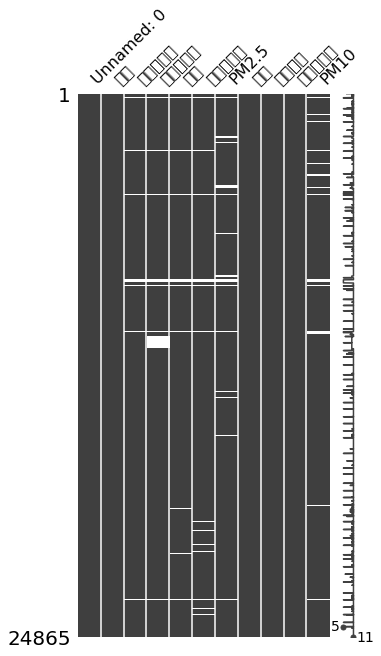

In [ ]:
import missingno as msno
msno.matrix(mise,figsize=(5,10))
plt.show()

In [ ]:
mise.isnull().sum()

Unnamed: 0       0
날짜               0
아황산가스          551
일산화탄소         1078
오존             598
이산화질소          689
PM2.5          890
시도               1
측정소명             1
측정소코드            1
PM10           710
dtype: int64

### 미세먼지 시각화

In [ ]:
mise_df=ulsan[['PM10',	'PM2.5']]
mise_df=mise_df.reset_index(drop=True)
mise_df

NameError: ignored

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(500), mise_linear['PM10'][:500],'--')
plt.plot(np.arange(500), mise_df['PM10'][:500], '.-')
plt.title('interpolated mise')

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(500), mise_knn['PM10'][:500],'--')
plt.plot(np.arange(500), mise_df['PM10'][:500], '.-')
plt.title('knn mise')

In [ ]:
#1차보간
mise_linear=mise_df.interpolate().fillna(method='bfill').reset_index(drop=True)
mise_linear

In [ ]:
#2차 보간
mise_poly=mise_df.interpolate(method='polynomial', order=2).fillna(method='bfill').reset_index(drop=True)
mise_poly

In [ ]:
#knn 보간
mise_knn=df[['PM10',	'PM2.5']]
mise_knn

In [ ]:
rain.info()

In [ ]:
#pd.qcut(rain.rain[rain['rain']>0],5) # [(-0.0009999999999799, 0.0254] < (0.0254, 0.608] < (0.608, 5.627] <(5.627, 174.136]]
#bins=[-0.001,0.0091,0.209,1.538,8.572,174.136]

In [ ]:
#rain=rain.rename(columns={'날짜':'time','강수량(mm)':'rain'})
#rain=rain[['time','rain']]
#rain=rain.fillna(0)
#rain['time']=pd.to_datetime(rain['time'])
#rain=rain.set_index('time').resample('H').mean().interpolate(method="polynomial", order=2)
#labels=[0,1,2,3,4]
#rain['rain']=pd.qcut(rain.rain[rain['rain']>0],5, labels=labels)

In [ ]:
#solar[:'2018-3-10'].plot(figsize=(25,5))

In [ ]:
#답
df = pd.DataFrame()
df['ds'] = energy['time']
df['y'] = energy['ulsan']
df.head()

# 2. 데이터 전처리
## 2. 1. 일기예보 1시간단위로 만들기

In [ ]:
# def fcst_hourly(time):
  
#   time=int(time)
#   fcst['Forecast_time'] = pd.to_datetime(fcst['Forecast time']) #예보 시점 datetime으로 바꾸기
  
#   #예보 시점 정의
#   fcst_time=fcst[fcst['Forecast_time'].dt.hour==time]

#   #예보 시점의 다음날 예보
#   fcst_time=fcst_time[(fcst_time['forecast']>=24-time)&(fcst_time['forecast']<48-time)]

#   #Forecast_time에 forecast 더해서 예보 시간 구하기
#   def to_date(x):
#     return pd.DateOffset(hours=x)

#   fcst_time['Forecast_time']=fcst_time['Forecast_time']+fcst_time['forecast'].map(to_date)

#   fcst_time=fcst_time[['Forecast_time', 'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']]

#   #한시간 간격 데이터프레임 만들어서 합치기
#   hourly=pd.DataFrame()
#   hourly['Forecast_time']=pd.date_range(start='2018-03-02 00:00:00', end='2021-03-01 23:00:00', freq='H')
#   fcst_time=pd.merge(hourly, fcst_time, how='outer') #default는 inner

#   return fcst_time

## 결측치

In [ ]:
#obs[obs['temp'].isnull()] #21820, 21836, 21837, 21840
#obs[obs['windSpeed'].isnull()] #11242
#obs[obs['humidity'].isnull()] #15395
#obs['cloud'] #채워야 할 결측치

In [ ]:
#ulsan.loc[11242-2:11242+2] #선형보간, ffill, ...

In [ ]:
#결측값 제거
#temp=obs[~obs['temp'].isnull()]
#temp=temp[~obs['windSpeed'].isnull()]
#temp=temp[~obs['humidity'].isnull()]
#temp=temp[~obs['cloud'].isnull()]
#temp

#원핫인코딩딩딩 
Tree 기반 모델에서는 더미화가 오히려 성능에 악영향을 주는경우가 종종 발생한다. 트리모델에서는 범주별로 이진화를 하게 되는데 만약 더미화를 하게되면 범주별로 변수처럼 인식하게 되므로 True, False 단  두가지로 분류되게 된다. 즉, 이 경우 더미화를 하게됨으로써 덜 정교하게 예측하게 된다

In [9]:
#1월 미세먼지, 초미세먼지 전처리
def mise_pm(file_name, pm):
  path='/content/drive/MyDrive/동서발전 태양광 발전량 예측 AI 경진대회/data/'
  df=pd.read_csv(path+f'{file_name}', sep='\t', header=None)
  df_values=df.values
  #type(df_values)
  datalist=[]
  datalist.append(df_values) #리스트로 변경
  df_array=np.array(datalist)
  df2=df_array.reshape(1,744)

  df3=pd.DataFrame(df2.T)
  df3['time']=pd.date_range(start='2021-01-01 01:00:00', end='2021-02-01 00:00:00', freq='H')
  df3=df3.rename(columns={0:f'{pm}'})
  return df3

ulsan_mise_pm25=mise_pm('ulsan_pm25.txt', 'PM2.5')
ulsan_mise_pm10=mise_pm('ulsan_pm10.txt', 'PM10')
dangjin_mise_pm25=mise_pm('dangjin_pm25.txt','PM2.5')
dangjin_mise_pm10=mise_pm('dangjin_pm10.txt','PM10')

#PM2.5, PM10 합치고 2월1일 0시 삭제, time을 인덱스로 
def mise_only(x,y):
  mise_add=pd.merge(x,y,on='time')
  mise_add=mise_add.iloc[:-1,:]
  mise_add=mise_add.set_index(mise_add['time'])
  return mise_add

ulsan_mise_jan=mise_only(ulsan_mise_pm25, ulsan_mise_pm10)
dangjin_mise_jan=mise_only(dangjin_mise_pm25, dangjin_mise_pm10)

In [10]:
path='/content/drive/MyDrive/동서발전 태양광 발전량 예측 AI 경진대회/data/'
obs=pd.read_csv(path+'ulsan_obs_data.csv')
site_info=pd.read_csv(path+'site_info.csv')
fcst=pd.read_csv(path+'ulsan_fcst_data.csv')
energy=pd.read_csv(path+'energy.csv')
solar=pd.read_csv(path+'pohang_ilsa.csv')
mise=pd.read_csv(path+'ulsan_mise.csv')
rain=pd.read_csv(path+'ulsan_rain.csv')

def preprocess(obs,solar,energy, rain, mise): 

  #관측자료 전처리
  obs_columns={'지점':'facility_code',
              '지점명':'facility_name',
              '일시':'time',
              '기온(°C)':'temp',
              '풍속(m/s)':'windSpeed',
              '풍향(16방위)':'windDirection',
              '습도(%)':'humidity',
              '전운량(10분위)':'cloud'
  }

  obs.rename(columns=obs_columns, inplace=True)
  obs['time']=pd.to_datetime(obs['time'])
  obs=obs.iloc[:,2:]
  
  #일사량 전처리
  solar.rename(columns={'일시':'time',
                      '일조(hr)':'sun_hr',
                      '일조 QC플래그':'sun_qc',
                      '일사(MJ/m2)':'solar'    
  }, inplace=True)
  solar=solar[['time','sun_hr','solar']]
  solar['time']=pd.to_datetime(solar['time'])
  solar=solar.fillna(0)

  data=pd.merge(obs, solar, how='inner', on='time')

  #해당 열들 더미화 다르게 해보기
  data['year']=data['time'].dt.year
  data['month']=data['time'].dt.month
  data['day']=data['time'].dt.day
  data['hour']=data['time'].dt.hour
  data['season']=data['time'].dt.month %12 //3 +1
  #겨울:1 봄:2 여름:3 가을:4

  #에너지 전처리
  #발전량 시간 1시 ->  0시로 바꾸기
  def convert_time(x):
      date, hr = x.split(' ')
      h,m,s = hr.split(':')
      h = str(int(h)-1)
      hr = ':'.join([h,m,s])
      return ' '.join([date, hr])

  energy['time']=energy['time'].apply(convert_time)
  energy['time']=pd.to_datetime(energy['time'])

  ulsan=energy[['ulsan']]
  ulsan=pd.concat([data,ulsan], axis=1)

    #기온 4개, 풍속, 풍향, 습도 1개씩 결측값 2차 polynomial 보간
  ulsan['temp'].interpolate(method='polynomial', order=2,inplace=True) 
  ulsan['windSpeed'].interpolate(method='polynomial', order=2,inplace=True) 
  ulsan['windDirection'].interpolate(method='polynomial', order=2,inplace=True) 
  ulsan['humidity'].interpolate(method='polynomial', order=2,inplace=True) 

  #강수량 시간 늘리고 보간 후 추가
  rain=rain.rename(columns={'날짜':'time','강수량(mm)':'rain'})
  rain=rain[['time','rain']]
  rain=rain.fillna(0)
  rain['time']=pd.to_datetime(rain['time'])
  rain=rain.set_index('time').resample('H').mean().interpolate()
  #labels=[0,1,2,3,4]
  #rain['rain']=pd.qcut(rain.rain[rain['rain']>0],5, labels=labels)
  ulsan=pd.merge(ulsan,rain, how='outer', on='time')
  ulsan['rain']=ulsan['rain'].fillna(0)

  #미세먼지 
  mise.rename(columns={'날짜':'time',
                   '아황산가스':'SO2',
                   '일산화탄소':'CO',
                   '오존':'O3',
                   '이산화질소':'NO2'}, inplace=True)
  mise=mise[['time','SO2','CO','O3','NO2','PM10','PM2.5']]
  mise['time']=pd.to_datetime(mise['time'])
  ulsan=pd.merge(ulsan,mise, how='outer', on='time')

  #1월 미세먼지 합치기
  #data는 시계열 형식의 time열을 가지고 있어야함.
  def add_jan(data,add):
    data=data.set_index(data['time'])
    data.fillna(add, inplace=True)
    #'-' nan으로 바꾸기
    data['PM10']=data['PM10'].apply(lambda x: np.nan if x=='-' else x)
    data['PM2.5']=data['PM2.5'].apply(lambda x: np.nan if x=='-' else x)
    return data
  ulsan=add_jan(ulsan,ulsan_mise_jan)

  #실수형으로 바꾸기
  ulsan=ulsan.iloc[:,1:].astype(np.float32, errors = 'raise')

  return ulsan

ulsan=preprocess(obs, solar, energy, rain, mise)

In [ ]:
ulsan.isnull().sum()

In [ ]:
ulsan.dtypes

In [ ]:
ulsan.pivot_table(['cloud','solar','temp'],columns='month')

In [ ]:

df[['temp','windSpeed','windDirection','humidity','PM2.5','PM10','sun_hr','solar','ulsan']][:500].plot(figsize=(30,50), subplots=True)
plt.title('tendency')

KNN으로 미세먼지 채우기

In [ ]:
#표준화 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[['temp','windSpeed','windDirection','humidity','sun_hr','solar','rain',
                                 'SO2','CO','O3','NO2','PM10','PM2.5']])
scaled = scaler.transform(df[['temp','windSpeed','windDirection','humidity','sun_hr','solar','rain',
                                 'SO2','CO','O3','NO2','PM10','PM2.5']])
#결과 ndarray임
scaled_std = pd.DataFrame(scaled, columns=['temp','windSpeed','windDirection','humidity','sun_hr','solar','rain',
                                 'SO2','CO','O3','NO2','PM10','PM2.5'])


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['temp','windSpeed','windDirection','humidity','sun_hr','solar','rain',
                                 'SO2','CO','O3','NO2','PM10','PM2.5']])
scaled = scaler.transform(df[['temp','windSpeed','windDirection','humidity','sun_hr','solar','rain',
                                 'SO2','CO','O3','NO2','PM10','PM2.5']])

# 역시나 transform() 결과가 ndarray라 DataFrame으로 바꿔준다.
scaled_nrm = pd.DataFrame(scaled, columns=['temp','windSpeed','windDirection','humidity','sun_hr','solar','rain',
                                 'SO2','CO','O3','NO2','PM10','PM2.5'])

In [ ]:
scaled_std

In [ ]:
# pip install impyute
# from impyute.imputation.cs import fast_knn

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=15)
filled = imputer.fit_transform(ulsan[['temp','windSpeed','windDirection','humidity','sun_hr','solar','rain',
                                 'SO2','CO','O3','NO2','PM10','PM2.5','ulsan']])
df = pd.DataFrame(filled, columns=['temp','windSpeed','windDirection','humidity','sun_hr','solar','rain',
                                 'SO2','CO','O3','NO2','PM10','PM2.5','ulsan'])
df

,temp,windSpeed,windDirection,humidity,sun_hr,solar,rain,SO2,CO,O3,NO2,PM10,PM2.5,ulsan
0,8.2,3.9,340.0,98.0,0.0,0.0,0.200000,0.003000,2.200000,0.039000,0.017000,17.333334,9.0,0.0
1,7.0,4.1,320.0,97.0,0.0,0.0,0.191667,0.003000,1.000000,0.056000,0.010000,17.000000,17.0,0.0
2,6.5,5.9,290.0,80.0,0.0,0.0,0.183333,0.003000,0.800000,0.057000,0.009000,29.600000,8.0,0.0
3,6.2,4.6,320.0,79.0,0.0,0.0,0.175000,0.003000,0.300000,0.061000,0.006000,21.466667,7.0,0.0
4,6.7,4.5,320.0,73.0,0.0,0.0,0.166667,0.003000,1.700000,0.056000,0.006000,21.933332,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25627,8.8,2.5,200.0,50.0,0.0,0.0,0.000000,0.014867,0.440000,0.021533,0.034067,30.000000,11.0,0.0
25628,8.7,3.9,200.0,49.0,0.0,0.0,0.000000,0.013400,0.393333,0.022333,0.033133,32.000000,16.0,0.0
25629,8.4,2.4,230.0,51.0,0.0,0.0,0.000000,0.015933,0.366667,0.025800,0.035733,40.000000,19.0,0.0
25630,9.4,3.3,230.0,51.0,0.0,0.0,0.000000,0.015600,0.366667,0.027067,0.034800,41.000000,18.0,0.0


In [ ]:
plt.figure(figsize=(10,5))
plt.plot(ulsan.PM10)
plt.plot(df.PM10)

In [ ]:
df[['windSpeed']].boxplot()

ValueError: ignored

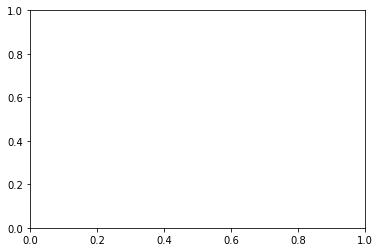

In [ ]:
k_list = range(1,50)
accuracies = []
for k in k_list:
  imputer = KNNImputer(n_neighbors=k)
  filled = imputer.fit_transform(df)
  
  accuracies.append()
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Classifier Accuracy")
plt.show()

In [ ]:
df2=ulsan['cloud'].reset_index(drop=True)
df2

0        10.0
1        10.0
2         NaN
3         3.0
4         1.0
         ... 
25627     5.0
25628     1.0
25629     7.0
25630     8.0
25631     9.0
Name: cloud, Length: 25632, dtype: float32

In [ ]:
df3=pd.concat([df, df2], axis=1)

In [ ]:
df4=df3[~df3['cloud'].isnull()]
df4

,temp,windSpeed,windDirection,humidity,sun_hr,solar,rain,SO2,CO,O3,NO2,PM10,PM2.5,ulsan,cloud
0,8.2,3.9,340.0,98.0,0.0,0.0,0.200000,0.003000,2.200000,0.039000,0.017000,17.333334,9.0,0.0,10.0
1,7.0,4.1,320.0,97.0,0.0,0.0,0.191667,0.003000,1.000000,0.056000,0.010000,17.000000,17.0,0.0,10.0
3,6.2,4.6,320.0,79.0,0.0,0.0,0.175000,0.003000,0.300000,0.061000,0.006000,21.466667,7.0,0.0,3.0
4,6.7,4.5,320.0,73.0,0.0,0.0,0.166667,0.003000,1.700000,0.056000,0.006000,21.933332,8.0,0.0,1.0
5,7.5,6.0,290.0,69.0,0.0,0.0,0.158333,0.007000,0.400000,0.056000,0.006000,25.000000,7.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25627,8.8,2.5,200.0,50.0,0.0,0.0,0.000000,0.014867,0.440000,0.021533,0.034067,30.000000,11.0,0.0,5.0
25628,8.7,3.9,200.0,49.0,0.0,0.0,0.000000,0.013400,0.393333,0.022333,0.033133,32.000000,16.0,0.0,1.0
25629,8.4,2.4,230.0,51.0,0.0,0.0,0.000000,0.015933,0.366667,0.025800,0.035733,40.000000,19.0,0.0,7.0
25630,9.4,3.3,230.0,51.0,0.0,0.0,0.000000,0.015600,0.366667,0.027067,0.034800,41.000000,18.0,0.0,8.0


In [ ]:
from sklearn.model_selection import train_test_split

x = df4[['temp','windSpeed','rain','solar','sun_hr','PM2.5','PM10']]
y = df4['cloud']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=10)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)
pred=classifier.predict(x_test)
accuracy_score(y_test, pred)

0.3438129786376461

In [18]:
path='/content/drive/MyDrive/동서발전 태양광 발전량 예측 AI 경진대회/data/'
obs=pd.read_csv(path+'ulsan_obs_data.csv')
site_info=pd.read_csv(path+'site_info.csv')
fcst=pd.read_csv(path+'ulsan_fcst_data.csv')
energy=pd.read_csv(path+'energy.csv')
solar=pd.read_csv(path+'pohang_ilsa.csv')
mise=pd.read_csv(path+'ulsan_mise.csv')
rain=pd.read_csv(path+'ulsan_rain.csv')

def preprocess(obs,solar,energy, rain, mise): 

  #관측자료 전처리
  obs_columns={'지점':'facility_code',
              '지점명':'facility_name',
              '일시':'time',
              '기온(°C)':'temp',
              '풍속(m/s)':'windSpeed',
              '풍향(16방위)':'windDirection',
              '습도(%)':'humidity',
              '전운량(10분위)':'cloud'
  }

  obs.rename(columns=obs_columns, inplace=True)
  obs['time']=pd.to_datetime(obs['time'])
  obs=obs.iloc[:,2:]
  
  #일사량 전처리
  solar.rename(columns={'일시':'time',
                      '일조(hr)':'sun_hr',
                      '일조 QC플래그':'sun_qc',
                      '일사(MJ/m2)':'solar'    
  }, inplace=True)
  solar=solar[['time','sun_hr','solar']]
  solar['time']=pd.to_datetime(solar['time'])
  solar=solar.fillna(0)

  data=pd.merge(obs, solar, how='inner', on='time')

  #해당 열들 더미화 다르게 해보기
  data['year']=data['time'].dt.year
  data['month']=data['time'].dt.month
  data['day']=data['time'].dt.day
  data['hour']=data['time'].dt.hour
  data['season']=data['time'].dt.month %12 //3 +1
  #겨울:1 봄:2 여름:3 가을:4

  #에너지 전처리
  #발전량 시간 1시 ->  0시로 바꾸기
  def convert_time(x):
      date, hr = x.split(' ')
      h,m,s = hr.split(':')
      h = str(int(h)-1)
      hr = ':'.join([h,m,s])
      return ' '.join([date, hr])

  energy['time']=energy['time'].apply(convert_time)
  energy['time']=pd.to_datetime(energy['time'])

  energy=energy[['ulsan']]
  ulsan=pd.concat([data,energy], axis=1)

    #기온 4개, 풍속, 풍향, 습도 1개씩 결측값 2차 polynomial 보간
  ulsan['temp'].interpolate(method='polynomial', order=2,inplace=True) 
  ulsan['windSpeed'].interpolate(method='polynomial', order=2,inplace=True) 
  ulsan['windDirection'].interpolate(method='polynomial', order=2,inplace=True) 
  ulsan['humidity'].interpolate(method='polynomial', order=2,inplace=True) 

  #강수량 시간 늘리고 보간 후 추가
  rain=rain.rename(columns={'날짜':'time','강수량(mm)':'rain'})
  rain=rain[['time','rain']]
  rain=rain.fillna(0)
  rain['time']=pd.to_datetime(rain['time'])
  rain=rain.set_index('time').resample('H').mean().interpolate()
  #labels=[0,1,2,3,4]
  #rain['rain']=pd.qcut(rain.rain[rain['rain']>0],5, labels=labels)
  ulsan=pd.merge(ulsan,rain, how='outer', on='time')
  ulsan['rain']=ulsan['rain'].fillna(0)

  #미세먼지 
  mise.rename(columns={'날짜':'time',
                   '아황산가스':'SO2',
                   '일산화탄소':'CO',
                   '오존':'O3',
                   '이산화질소':'NO2'}, inplace=True)
  mise=mise[['time','SO2','CO','O3','NO2','PM10','PM2.5']]
  mise['time']=pd.to_datetime(mise['time'])
  ulsan=pd.merge(ulsan,mise, how='outer', on='time')

  #1월 미세먼지 합치기
  #data는 시계열 형식의 time열을 가지고 있어야함.
  def add_jan(data,add):
    data=data.set_index(data['time'])
    data.fillna(add, inplace=True)
    #'-' nan으로 바꾸기
    data['PM10']=data['PM10'].apply(lambda x: np.nan if x=='-' else x)
    data['PM2.5']=data['PM2.5'].apply(lambda x: np.nan if x=='-' else x)
    return data
  ulsan=add_jan(ulsan,ulsan_mise_jan)

  #실수형으로 바꾸기
  ulsan=ulsan.iloc[:,1:].astype(np.float32, errors = 'raise')

  return ulsan

ulsan=preprocess(obs, solar, energy, rain, mise)

In [19]:
ulsan.isnull().sum()

temp                0
windSpeed           0
windDirection       0
humidity            0
cloud             825
sun_hr              0
solar               0
year                0
month               0
day                 0
hour                0
season              0
ulsan               0
rain                0
SO2              1318
CO               1845
O3               1365
NO2              1456
PM10              741
PM2.5             920
dtype: int64

In [17]:
#k 1부타 100 넣고 시각화
k_list = range(1,101)
accuracies = []
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(x_train, y_train)
  accuracies.append(accuracy_score(y_test, pred))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Classifier Accuracy")
plt.show()

NameError: ignored

In [ ]:
#미세먼지 1월 없음 
#ulsan_setback=ulsan.set_index(ulsan.time)[:'2020'].reset_index(drop=True)

In [ ]:
#ulsan_mise=pd.merge(ulsan_setback, mise, on='time')

In [ ]:
# # 카테고리 데이터를 one-hot-encoding
# def dummy_data(data, columns):
#     for column in columns:
#         data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
#         data = data.drop(column, axis=1)
#     return data
# dummy_columns = ['season']
# train_dummy = dummy_data(ulsan, dummy_columns)
# #test_dummy = dummy_data(test, dummy_columns)

# print('원핫인코딩 전 shape')
# print(ulsan.shape)
# #print(test.shape)

# print('get_dummies로 원핫인코딩 후 shape')
# print(train_dummy.shape)
# #print(test_dummy.shape)
## train_dummy

In [ ]:
#train_dummy.index=train_dummy['time']
#train_dummy['2018-':'2018-7-25'].head(20)

In [ ]:
# #사이킷런 원핫인코딩
# from sklearn.preprocessing import OneHotEncoder
# OneHotEncoder(categorical_features=['#']) #인덱스번호
# .fit_transform(X).toarray()

In [11]:
#결측치 제외
#train_dummy=train_dummy[~train_dummy['cloud'].isnull()] #더미화 할경우
ulsan_cloud=ulsan[~ulsan['cloud'].isnull()]

In [ ]:
#미세먼지 포함 데이터(2021년 없음) 결측치 제외
ulsan_cloud_mise=ulsan_mise[~ulsan_mise['cloud'].isnull()]

In [32]:
#데이터 7:3으로 나누기
from sklearn.model_selection import train_test_split

x = ulsan_cloud[['humidity','sun_hr','solar','month','day','hour','temp','windSpeed','windDirection','rain']] #'month','day','hour'
y = ulsan_cloud[['cloud']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

In [ ]:
from sklearn.model_selection import train_test_split

x = df[['sun_hr','solar']]
y = df[['ulsan']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=10)

### 2. 2.  랜덤포레스트



In [ ]:
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import accuracy_score
#
#
#model=LinearRegression()
#
#model.fit(x_train, y_train)
#y_label=model.predict(x_test)
#y_label

In [ ]:
#하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 50,100],
           'max_depth' : [8, 10, 12, 14, 16],
           #'max_terminal_nodes':[8, 12, 16],
           'min_samples_leaf' : [6, 8, 10,12],
           'min_samples_split' : [4, 8, 16]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 10, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

In [ ]:
# # we pass the preprocessing pipeline as a step to the full pipeline
# full_pipeline_steps = [
#     ('preprocessing_pipeline', preprocessing_pipeline),
#     ('model', RandomForestClassifier(random_state=seed))
# ]
# # create the full pipeline object
# full_pipeline = Pipeline(steps=full_pipeline_steps)
# # Create the grid search parameter grid and scoring funcitons
# param_grid = {
#     "model": [RandomForestClassifier(random_state=seed)],
#     "model__max_depth": np.linspace(1, 32, 32),
#     "model__n_estimators": np.arange(100, 1000, 100),
#     "model__criterion": ["gini","entropy"],
#     "model__max_leaf_nodes": [16, 64, 128, 256],
#     "model__oob_score": [True],
# }
# scoring = {
#     'AUC': 'roc_auc', 
#     'Accuracy': make_scorer(accuracy_score)
# }
# # create the Kfold object
# num_folds = 3
# kfold = StratifiedKFold(n_splits=num_folds, random_state=seed)
# # create the grid search object with the full pipeline as estimator
# n_iter=3
# grid = RandomizedSearchCV(
#     estimator=full_pipeline, 
#     param_distributions=param_grid,
#     cv=kfold,
#     scoring=scoring,
#     n_jobs=1,
#     n_iter=n_iter,
#     refit="AUC"
# )
# # fit grid search
# best_rf = grid.fit(X_train,y_train)
# print(f'Best score: {best_rf.best_score_}')
# print(f'Best model: {best_rf.best_params_}')

In [21]:
#결과로 나온 최적 하이퍼 파라미터로 다시 모델을 학습하여 테스트 세트 데이터에서 예측 성능을 측정
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_mdl = RandomForestClassifier(n_estimators = 100, 
                                max_depth = 14,
                                min_samples_leaf = 4,
                                min_samples_split = 8,
                                random_state = 10,
                                n_jobs = -1)
rf_mdl.fit(x_train, y_train)
pred = rf_mdl.predict(x_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.4938


In [22]:
print(rf_mdl.score(x_train,y_train))
print(rf_mdl.score(x_test, y_test))

0.6728288412808109
0.49375251914550583


특성중요도: [0.18445392 0.08390523 0.08204162 0.05623004 0.08670349 0.07197358
 0.12957594 0.08098402 0.05260882 0.17152336]


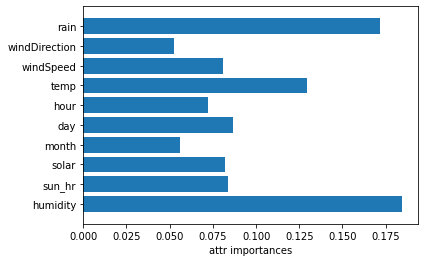

In [23]:
#from sklearn.metrics import classification_report
#classification_report(pred, y_test)

#특성중요도
print(f"특성중요도: {rf_mdl.feature_importances_}")

def plot_feature_importances(model):
    n_features = x_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x_train.columns)
    plt.xlabel("attr importances")
    plt.ylim(-1, n_features)
    plt.show()

plot_feature_importances(rf_mdl)

시각화

In [ ]:
real=y_test.reset_index(drop=True)

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(real[:100])
plt.plot(pred[:100])
plt.legend(['actual','pred'])

In [25]:
#결측치 데이터 넣고 cloud 결측치 예측
ulsan_no_cloud=ulsan[ulsan['cloud'].isnull()]
x_test=ulsan_no_cloud[['humidity','sun_hr','solar','month','day','hour','temp','windSpeed','windDirection','rain']]
y_test=ulsan_no_cloud['cloud']
pred=rf_mdl.predict(x_test)

ulsan_no_cloud['cloud']=pred
ulsan_no_cloud

ulsan_final=pd.concat([ulsan_cloud,ulsan_no_cloud]).sort_index()
ulsan_final=ulsan_final.iloc[:,:14]
ulsan_final

,temp,windSpeed,windDirection,humidity,cloud,sun_hr,solar,year,month,day,hour,season,ulsan,rain
time,,,,,,,,,,,,,,
2018-03-01 00:00:00,8.2,3.9,340.0,98.0,10.0,0.0,0.0,2018.0,3.0,1.0,0.0,2.0,0.0,0.200000
2018-03-01 01:00:00,7.0,4.1,320.0,97.0,10.0,0.0,0.0,2018.0,3.0,1.0,1.0,2.0,0.0,0.191667
2018-03-01 02:00:00,6.5,5.9,290.0,80.0,10.0,0.0,0.0,2018.0,3.0,1.0,2.0,2.0,0.0,0.183333
2018-03-01 03:00:00,6.2,4.6,320.0,79.0,3.0,0.0,0.0,2018.0,3.0,1.0,3.0,2.0,0.0,0.175000
2018-03-01 04:00:00,6.7,4.5,320.0,73.0,1.0,0.0,0.0,2018.0,3.0,1.0,4.0,2.0,0.0,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-31 19:00:00,8.8,2.5,200.0,50.0,5.0,0.0,0.0,2021.0,1.0,31.0,19.0,1.0,0.0,0.000000
2021-01-31 20:00:00,8.7,3.9,200.0,49.0,1.0,0.0,0.0,2021.0,1.0,31.0,20.0,1.0,0.0,0.000000
2021-01-31 21:00:00,8.4,2.4,230.0,51.0,7.0,0.0,0.0,2021.0,1.0,31.0,21.0,1.0,0.0,0.000000


In [34]:
ulsan_final['cloud'].value_counts()
ulsan_final.isnull().sum()

temp             0
windSpeed        0
windDirection    0
humidity         0
cloud            0
sun_hr           0
solar            0
year             0
month            0
day              0
hour             0
season           0
ulsan            0
rain             0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x=scaled_std
y=df[['ulsan']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=10)

In [ ]:
pred

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf_mdl = RandomForestRegressor(n_estimators = 100, 
                                max_depth = 14,
                                min_samples_leaf = 4,
                                min_samples_split = 8,
                                random_state = 10,
                                n_jobs = -1)
rf_mdl.fit(x_train, y_train)
pred = rf_mdl.predict(x_test)
print('R-squared: {:.4f}'.format(rf_mdl.score(x_train,y_train)))
print('RMSE: {:.4f}'.format(mean_squared_error(y_test, pred)*(1/2.0)))

R-squared: 0.7702
RMSE: 3.3174


In [ ]:
#발전량 예측

In [ ]:
rf_mdl

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


model=LinearRegression()

model.fit(x_train, y_train)
y_label=model.predict(x_test)
y_label #안된다

In [ ]:
#시계열 데이터 추가하는 법...

In [ ]:
real=y_test.reset_index(drop=True)
real

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(real[:100])
plt.plot(y_label[:100])
plt.legend(['actual','pred'])

In [ ]:
# fcst_11=fcst_hourly(11).interpolate(method='polynomial', order=2)
# fcst_11.head(15)

In [ ]:
# plt.figure(figsize=(20,5))
# days = 700
# plt.plot(fcst_11.loc[:24*days, 'Forecast_time'], fcst_11.loc[:24*days, 'Temperature'], '.-')
# plt.plot(fcst_hourly(11).loc[:24*days, 'Forecast_time'], fcst_hourly(11).loc[:24*days, 'Temperature'], 'o')
# plt.plot(obs.loc[25:24*(days+1),'time'], obs.loc[25:24*(days+1), 'temp'], '-g')
# plt.legend(['interpolated','predicted','actual'])

In [ ]:
#확인해보고 싶은 것
# 기상예보가 달라지는 것의 영향

In [ ]:
# 1. 예측값과 실제값 비교
# 2. 관측 자료로 학습하기

In [ ]:
# from sklearn.linear_model import LinearRegression

# model_fcst=LinearRegression()

# model_fcst.fit(x_train, y_train)
# y_label=model_fcst.predict(x_test)
# y_label
# y_test.Temperature.values

In [ ]:
# plt.figure(figsize=(15,10))
# plt.plot(y_label[:50])
# plt.plot(y_test.Temperature.values[:50])

# model_fcst= sm.Logit.from_formula("Temperature ~ Forecast_time+Humidity+WindSpeed+WindDirection+Cloud", fcst_11)
# result_fcst = model_fcst.fit()
# print(result_fcst.summary())